In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [9]:
from os.path import dirname
dirPath = dirname(dirname(os.getcwd()))+"\codec\TotalCleanedTest.csv"
dirPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\codec\\TotalCleanedTest.csv'

In [10]:
df = pd.read_csv(dirPath)
df.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,complicaro,peso,lengua,loc_ocur,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex
0,0,1,Aguascalientes,1001,Aguascalientes,1,Aguascalientes,1001,Aguascalientes,1,...,8,8888.0,NaN,NaN,C25,Tumor maligno de la cabeza del páncreas,Pancreas,C25,Tumor maligno del páncreas,Pancreas
1,1,1,Aguascalientes,1002,Asientos,1,Aguascalientes,1002,Asientos,1,...,8,8888.0,NaN,NaN,C22,"Tumor maligno del hígado, no especificado",Liver,C22,Tumor maligno del hígado y de las vías biliare...,Liver
2,2,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,2,8888.0,NaN,NaN,C25,"Tumor maligno del páncreas, parte no especificada",Pancreas,C25,Tumor maligno del páncreas,Pancreas
3,3,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,2,8888.0,NaN,NaN,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs
4,4,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8,8888.0,NaN,NaN,C49,Tumor maligno de parte especificada del peritoneo,Soft Tissue,C49,Tumores malignos de los tejidos mesoteliales y...,Soft Tissue


In [11]:
index_names = df[((df['anio_ocur'] == 99) | (df['mes_ocurr'] == 99)| (df['dia_ocurr'] == 99))].index
df.drop(index_names, inplace = True) 
#index_names = df[((df['anio_nacim'] == 99) | (df['mes_nacim'] == 99)| (df['dia_nacim'] == 99))].index
#df.drop(index_names, inplace = True) 
df.shape[0]

785368

In [12]:
yearCount = df['anio_ocur'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount = yearCount.sort_values(by=['unique_values'])
yearCount.set_index('unique_values', inplace = True)
yearCount

,counts
unique_values,
1924,1
1925,1
1929,1
1939,1
1950,1
...,...
2015,79317
2016,82375
2017,83675


In [13]:
index_names = df.loc[(df['anio_ocur'] < 2010)].index
df.drop(index_names, inplace = True) 
index_names = df.loc[(df['anio_ocur'] > 2019)].index
df.drop(index_names, inplace = True) 
df.shape[0]

783255

In [14]:
yearCount = df['anio_ocur'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount = yearCount.sort_values(by=['unique_values'])
yearCount.set_index('unique_values', inplace = True)
yearCount

,counts
unique_values,
2010,70242
2011,71234
2012,73231
2013,75050
2014,76843
2015,79317
2016,82375
2017,83675
2018,85003


In [15]:
cols=["anio_ocur","mes_ocurr","dia_ocurr"]
df['date_ocurr'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,peso,lengua,loc_ocur,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,date_ocurr
0,0,1,Aguascalientes,1001,Aguascalientes,1,Aguascalientes,1001,Aguascalientes,1,...,8888.0,NaN,NaN,C25,Tumor maligno de la cabeza del páncreas,Pancreas,C25,Tumor maligno del páncreas,Pancreas,2010-1-11
1,1,1,Aguascalientes,1002,Asientos,1,Aguascalientes,1002,Asientos,1,...,8888.0,NaN,NaN,C22,"Tumor maligno del hígado, no especificado",Liver,C22,Tumor maligno del hígado y de las vías biliare...,Liver,2010-1-5
3,3,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs,2010-1-14
4,4,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C49,Tumor maligno de parte especificada del peritoneo,Soft Tissue,C49,Tumores malignos de los tejidos mesoteliales y...,Soft Tissue,2010-1-20
5,5,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C20,"Tumor maligno del colon, parte no especificada",Colon and Rectum,C20,Tumor maligno del colon,Colon and Rectum,2010-1-27


In [16]:
index_names = df[(df['date_ocurr'] == '2012-6-31')].index
df.drop(index_names, inplace = True) 

In [17]:
df['date_ocurr']=pd.to_datetime(df['date_ocurr'], yearfirst = True, errors = 'raise')

In [18]:
df.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,peso,lengua,loc_ocur,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,date_ocurr
0,0,1,Aguascalientes,1001,Aguascalientes,1,Aguascalientes,1001,Aguascalientes,1,...,8888.0,NaN,NaN,C25,Tumor maligno de la cabeza del páncreas,Pancreas,C25,Tumor maligno del páncreas,Pancreas,2010-01-11
1,1,1,Aguascalientes,1002,Asientos,1,Aguascalientes,1002,Asientos,1,...,8888.0,NaN,NaN,C22,"Tumor maligno del hígado, no especificado",Liver,C22,Tumor maligno del hígado y de las vías biliare...,Liver,2010-01-05
3,3,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs,2010-01-14
4,4,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C49,Tumor maligno de parte especificada del peritoneo,Soft Tissue,C49,Tumores malignos de los tejidos mesoteliales y...,Soft Tissue,2010-01-20
5,5,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,8888.0,NaN,NaN,C20,"Tumor maligno del colon, parte no especificada",Colon and Rectum,C20,Tumor maligno del colon,Colon and Rectum,2010-01-27


In [19]:
yearCount = df['date_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount = yearCount.sort_values(by=['unique_values'])
yearCount.set_index('unique_values', inplace = True)
yearCount

,counts
unique_values,
2010-01-01,235
2010-01-02,174
2010-01-03,177
2010-01-04,190
2010-01-05,173
...,...
2019-12-27,188
2019-12-28,177
2019-12-29,184


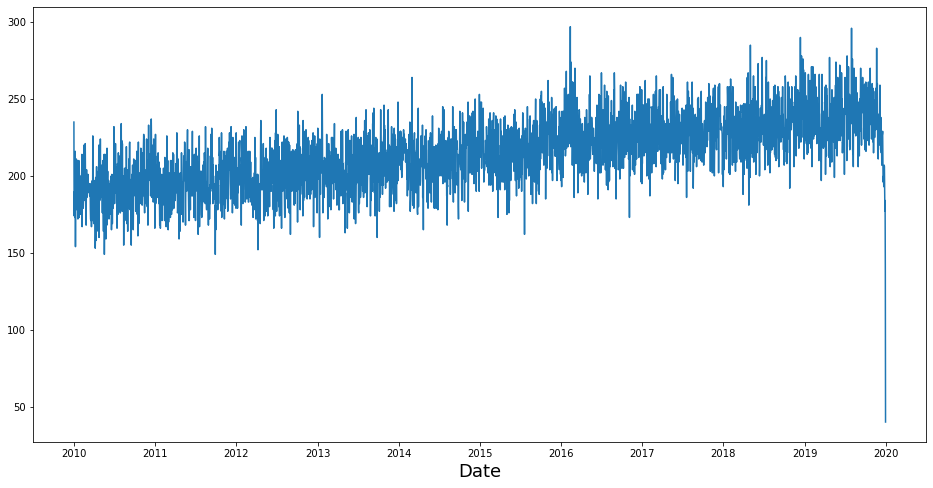

In [20]:
plt.figure(figsize=(16,8))
plt.plot(yearCount['counts'])
plt.xlabel('Date',fontsize=18)
plt.show()

## monthly

In [21]:
df['month_year_ocurr'] = pd.to_datetime(df.anio_ocur.astype(str) + '-' + df.mes_ocurr.astype(str))
df.head()

,Unnamed: 0,ent_regis,ent_regis_nm,mun_regis,mun_regis_nm,ent_resid,ent_resid_nm,mun_resid,mun_resid_nm,ent_ocurr,...,lengua,loc_ocur,ICD,detailCaus,Organ,ICD_Mex,detailCaus_Mex,organ_Mex,date_ocurr,month_year_ocurr
0,0,1,Aguascalientes,1001,Aguascalientes,1,Aguascalientes,1001,Aguascalientes,1,...,NaN,NaN,C25,Tumor maligno de la cabeza del páncreas,Pancreas,C25,Tumor maligno del páncreas,Pancreas,2010-01-11,2010-01-01
1,1,1,Aguascalientes,1002,Asientos,1,Aguascalientes,1002,Asientos,1,...,NaN,NaN,C22,"Tumor maligno del hígado, no especificado",Liver,C22,Tumor maligno del hígado y de las vías biliare...,Liver,2010-01-05,2010-01-01
3,3,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,NaN,NaN,C34,"Tumor maligno de los bronquios o del pulmón, p...",Lungs,C34,"Tumor maligno de la tráquea, de los bronquios ...",Lungs,2010-01-14,2010-01-01
4,4,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,NaN,NaN,C49,Tumor maligno de parte especificada del peritoneo,Soft Tissue,C49,Tumores malignos de los tejidos mesoteliales y...,Soft Tissue,2010-01-20,2010-01-01
5,5,1,Aguascalientes,1003,Calvillo,1,Aguascalientes,1003,Calvillo,1,...,NaN,NaN,C20,"Tumor maligno del colon, parte no especificada",Colon and Rectum,C20,Tumor maligno del colon,Colon and Rectum,2010-01-27,2010-01-01


In [22]:
yearCount2 = df['month_year_ocurr'].value_counts().rename_axis('unique_values').reset_index(name='counts')
yearCount2 = yearCount2.sort_values(by=['unique_values'])
yearCount2.set_index('unique_values', inplace = True)
yearCount2

,counts
unique_values,
2010-01-01,5937
2010-02-01,5417
2010-03-01,5808
2010-04-01,5586
2010-05-01,5882
...,...
2019-08-01,7417
2019-09-01,7297
2019-10-01,7546


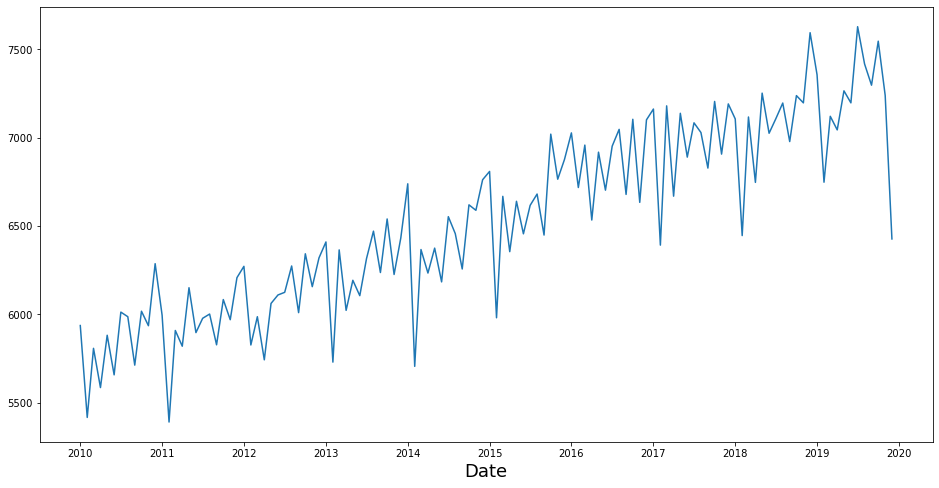

In [23]:
plt.figure(figsize=(16,8))
plt.plot(yearCount2['counts'])
plt.xlabel('Date',fontsize=18)
plt.show()

In [24]:
#override Test
pPath = dirname(dirname(os.getcwd()))+'\\codec\\TotalCleanedTest.csv'
df.to_csv(pPath)
pPath

'c:\\Users\\David Fernandez\\Desktop\\cancerDataAnalysis\\codec\\TotalCleanedTest.csv'